In [1]:
#pip install opencv-python

In [2]:
#pip install deepface

In [3]:
#pip install tensorflow

In [4]:
import cv2

In [5]:
import matplotlib.pyplot as plt

In [6]:
from deepface import DeepFace

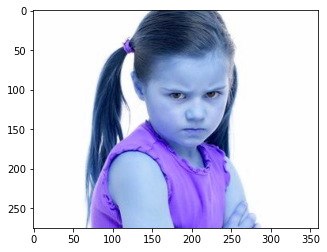

In [7]:
img = cv2.imread('angrygirl.jpg')
plt.imshow(img) #BGR

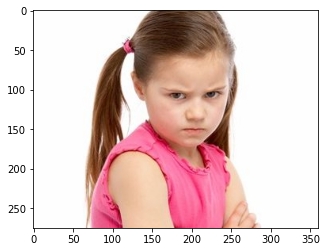

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
predictions = DeepFace.analyze(img,actions = ['emotion'])

In [10]:
predictions

{'emotion': {'angry': 83.5774829135825,
  'disgust': 8.146724752993111e-09,
  'fear': 0.31480728196694147,
  'happy': 0.004117121961662365,
  'sad': 6.155329192002368,
  'surprise': 0.0003165278674204913,
  'neutral': 9.947946515556962},
 'dominant_emotion': 'angry'}

In [11]:
predictions['dominant_emotion']

'angry'

In [12]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0),2)

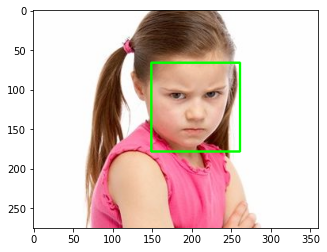

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
#inserting text on video
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
                predictions['dominant_emotion'],
                (0,25),
                font, 1,
                (0, 0, 25),
                1,
                cv2.LINE_4);

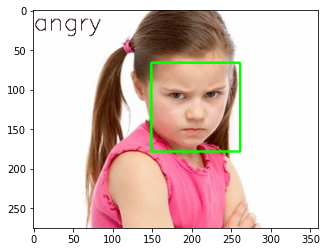

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
from deepface import DeepFace
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame = cap.read()##read one image from a video
    result = DeepFace.analyze(frame,actions = ['emotion'])
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
    font = cv2.FONT_HERSHEY_SIMPLEX


    cv2.putText(frame,
                result['dominant_emotion'],
                (50,50),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
    cv2.imshow('Original video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()